Importing libraries

In [1]:
import numpy as np
import pandas as pd

Importing data files

In [2]:
links = pd.read_csv(r"C:\Users\errav\Downloads\movie_data\links.csv")

In [3]:
movies = pd.read_csv(r"C:\Users\errav\Downloads\movie_data\movies.csv")

In [4]:
ratings = pd.read_csv(r"C:\Users\errav\Downloads\movie_data\ratings.csv")

In [5]:
tags = pd.read_csv(r"C:\Users\errav\Downloads\movie_data\tags.csv")

# Questions and Answers

# Download the data from the above link. How many ".csv" files are available in the dataset?

In [6]:
#shape of movies
movies.shape

(9742, 3)

# What is the shape of "movies.csv"?

In [7]:
#shape of ratings
ratings.shape

(100836, 4)

# What is the shape of "ratings.csv"?

In [8]:
#How many unique "userId" are available in "ratings.csv"?
ratings.userId.unique

<bound method Series.unique of 0           1
1           1
2           1
3           1
4           1
         ... 
100831    610
100832    610
100833    610
100834    610
100835    610
Name: userId, Length: 100836, dtype: int64>

# Which movie has recieved maximum number of user ratings?


In [9]:
movies

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy
9739,193585,Flint (2017),Drama
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation


In [10]:
ratings

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
...,...,...,...,...
100831,610,166534,4.0,1493848402
100832,610,168248,5.0,1493850091
100833,610,168250,5.0,1494273047
100834,610,168252,5.0,1493846352


In [11]:
Rated = pd.merge(movies, ratings, on='movieId').groupby(['movieId' , 'title'])['rating'].count().sort_values(ascending=False)
Rated

movieId  title                                 
356      Forrest Gump (1994)                       329
318      Shawshank Redemption, The (1994)          317
296      Pulp Fiction (1994)                       307
593      Silence of the Lambs, The (1991)          279
2571     Matrix, The (1999)                        278
                                                  ... 
4093     Cop (1988)                                  1
4089     Born in East L.A. (1987)                    1
58351    City of Men (Cidade dos Homens) (2007)      1
4083     Best Seller (1987)                          1
193609   Andrew Dice Clay: Dice Rules (1991)         1
Name: rating, Length: 9724, dtype: int64

# Select all the correct tags submitted by users to "Matrix, The (1999)" movie?

In [12]:
tags

,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992
3,2,89774,Boxing story,1445715207
4,2,89774,MMA,1445715200
...,...,...,...,...
3678,606,7382,for katie,1171234019
3679,606,7936,austere,1173392334
3680,610,3265,gun fu,1493843984
3681,610,3265,heroic bloodshed,1493843978


In [18]:
df = pd.merge(movies, tags, on='movieId')
matrix_tags_all = df.loc[merged['title'] == 'Matrix, The (1999)', 'tag']
print(f"Correct tags for 'Matrix, The (1999)': {', '.join(matrix_tags_all)}")


Correct tags for 'Matrix, The (1999)': martial arts, sci-fi, alternate universe, philosophy, post apocalyptic


# What is the average user rating for movie named "Terminator 2: Judgment Day (1991)"?

In [19]:
terminator = pd.merge(movies,ratings,on="movieId")[pd.merge(movies,ratings,on="movieId")["title"]=="Terminator 2: Judgment Day (1991)"]['rating'].mean()
terminator

3.970982142857143

# How does the data distribution of user ratings for "Fight Club (1999)" movie looks like?

<Axes: ylabel='Density'>

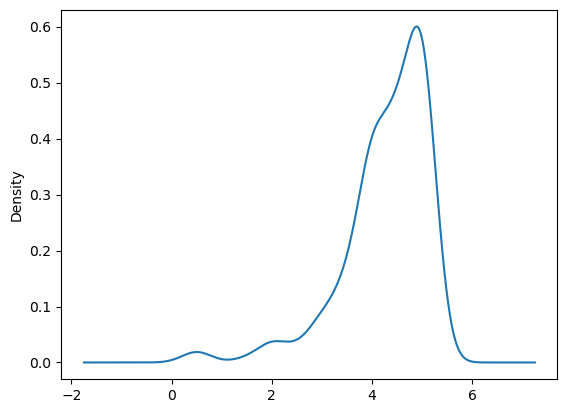

In [20]:
pd.merge(movies,ratings,on="movieId")[pd.merge(movies,ratings,on="movieId")["title"]=="Fight Club (1999)"]['rating'].plot(kind="kde")

🟢 IMPORTANT NOTE 1 🟢
Now that you have a good enough understanding of the given data, apply the "Mandatory Operation" given below before solving any of the following questions.

Mandatory Operations:
1. Group the user ratings based on movieId and apply aggregation operations like count and mean on ratings. 
2. Apply inner join on dataframe created from movies.csv and the grouped df from step 1.
3. Filter only those movies which have more than 50 user ratings (i.e. > 50).

Above steps will make sure that your data contains only those movies which has recieved more than 50 user ratings.

In [50]:
groupby_ratings = ratings.groupby('movieId').agg({'rating': ['count', 'mean']}).reset_index()
groupby_ratings.columns = ['movieId', 'rating_count', 'rating_mean']
data = pd.merge(movies, groupby_ratings, on='movieId', how='inner')
filtered_data = data[data['rating_count'] > 50]
filtered_data.head()

,movieId,title,genres,rating_count,rating_mean
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,215,3.920930
1,2,Jumanji (1995),Adventure|Children|Fantasy,110,3.431818
2,3,Grumpier Old Men (1995),Comedy|Romance,52,3.259615
5,6,Heat (1995),Action|Crime|Thriller,102,3.946078
6,7,Sabrina (1995),Comedy|Romance,54,3.185185


In [51]:
filtered_data.shape

(436, 5)

# Which movie is the most popular based on  average user ratings?

In [53]:
filtered_data[['title','rating_mean']].sort_values(by = 'rating_mean',ascending = False)

,title,rating_mean
277,"Shawshank Redemption, The (1994)",4.429022
659,"Godfather, The (1972)",4.289062
2224,Fight Club (1999),4.272936
974,Cool Hand Luke (1967),4.271930
602,Dr. Strangelove or: How I Learned to Stop Worr...,4.268041
...,...,...
144,Johnny Mnemonic (1995),2.679245
145,Judge Dredd (1995),2.669355
376,City Slickers II: The Legend of Curly's Gold (...,2.645455
379,Coneheads (1993),2.420635


# Select all the correct options which comes under top 5 popular movies based on number of user ratings.

In [55]:
filtered_data[['title','rating_count']].sort_values(by = 'rating_count',ascending = False)

,title,rating_count
314,Forrest Gump (1994),329
277,"Shawshank Redemption, The (1994)",317
257,Pulp Fiction (1994),307
510,"Silence of the Lambs, The (1991)",279
1938,"Matrix, The (1999)",278
...,...,...
3147,Blow (2001),51
3490,Training Day (2001),51
3539,Mulholland Drive (2001),51
118,Bad Boys (1995),51


# Which Sci-Fi movie is "third most popular" based on the number of user ratings?

In [59]:
scifi_movies = filtered_data[filtered_data['genres'].str.contains('Sci-Fi', case=False)]
scifi_movies_s = scifi_movies.sort_values(by='rating_count', ascending=False)
scifi_movies_s

,movieId,title,genres,rating_count,rating_mean
1938,2571,"Matrix, The (1999)",Action|Sci-Fi|Thriller,278,4.192446
224,260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Sci-Fi,251,4.231076
418,480,Jurassic Park (1993),Action|Adventure|Sci-Fi|Thriller,238,3.750000
507,589,Terminator 2: Judgment Day (1991),Action|Sci-Fi,224,3.970982
897,1196,Star Wars: Episode V - The Empire Strikes Back...,Action|Adventure|Sci-Fi,211,4.215640
...,...,...,...,...,...
8673,122904,Deadpool (2016),Action|Adventure|Comedy|Sci-Fi,54,3.833333
144,172,Johnny Mnemonic (1995),Action|Sci-Fi|Thriller,53,2.679245
2028,2701,Wild Wild West (1999),Action|Comedy|Sci-Fi|Western,53,2.207547
559,673,Space Jam (1996),Adventure|Animation|Children|Comedy|Fantasy|Sc...,53,2.707547


In [60]:
third_most_popular= scifi_movies_s.iloc[2]['title']
third_most_popular

'Jurassic Park (1993)'

🟢 IMPORTANT NOTE 2 🟢
You already have a subset of data containing only those movies which has recieved more than 50 user ratings.

Using "links.csv", scrape the IMDB reviews of each movie with more than 50 user ratings. "README.md" file contains the required details.

If you are unable to write the webscraping script yourself, you can request the same by commenting LinkedIn Post.

In [62]:
file_path = r"C:\Users\errav\Downloads\movie_data\README.txt"

In [63]:
with open(file_path, 'r') as file:
    file_content = file.read()
print(file_content)

Summary

This dataset (ml-latest-small) describes 5-star rating and free-text tagging activity from [MovieLens](http://movielens.org), a movie recommendation service. It contains 100836 ratings and 3683 tag applications across 9742 movies. These data were created by 610 users between March 29, 1996 and September 24, 2018. This dataset was generated on September 26, 2018.

Users were selected at random for inclusion. All selected users had rated at least 20 movies. No demographic information is included. Each user is represented by an id, and no other information is provided.

The data are contained in the files `links.csv`, `movies.csv`, `ratings.csv` and `tags.csv`. More details about the contents and use of all these files follows.

This is a *development* dataset. As such, it may change over time and is not an appropriate dataset for shared research results. See available *benchmark* datasets if that is your intent.

This and other GroupLens data sets are publicly available for down

In [93]:
links

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0
...,...,...,...
9737,193581,5476944,432131.0
9738,193583,5914996,445030.0
9739,193585,6397426,479308.0
9740,193587,8391976,483455.0


In [132]:
def scrapper(imdbId):
    id = str(int(imdbId))
    n_zeroes = 7 - len(id)
    new_id = "0"*n_zeroes + id
    URL = f"https://www.imdb.com/title/tt{new_id}/"
    request_header = {'Content-Type': 'text/html; charset=UTF-8', 
                      'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:109.0) Gecko/20100101 Firefox/119.0', 
                      'Accept-Encoding': 'gzip, deflate, br'}
    response = requests.get(URL, headers=request_header)
    soup = BeautifulSoup(response.text)
    imdb_rating = soup.find('span', attrs={'class' : 'sc-bde20123-1 cMEQkK'})
    return imdb_rating.text if imdb_rating else np.nan

In [133]:
imdb_rating = pd.merge(filtered_data,links,on='movieId')


In [135]:
imdb_rating['im_ratings'] = imdb_rating['imdbId'].apply(scrapper)


In [137]:
imdb_rating

,movieId,title,genres,rating_count,rating_mean,imdb_ratings,imdbId,tmdbId,im_ratings
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,215,3.920930,8.3,114709,862.0,8.3
1,2,Jumanji (1995),Adventure|Children|Fantasy,110,3.431818,7.1,113497,8844.0,7.1
2,3,Grumpier Old Men (1995),Comedy|Romance,52,3.259615,6.6,113228,15602.0,6.6
3,6,Heat (1995),Action|Crime|Thriller,102,3.946078,7.2,113277,949.0,8.3
4,7,Sabrina (1995),Comedy|Romance,54,3.185185,6.8,114319,11860.0,6.3
...,...,...,...,...,...,...,...,...,...
431,106782,"Wolf of Wall Street, The (2013)",Comedy|Crime|Drama,54,3.916667,NaN,993846,106646.0,8.2
432,109374,"Grand Budapest Hotel, The (2014)",Comedy|Drama,52,3.778846,NaN,2278388,120467.0,8.1
433,109487,Interstellar (2014),Sci-Fi|IMAX,73,3.993151,NaN,816692,157336.0,8.7
434,112852,Guardians of the Galaxy (2014),Action|Adventure|Sci-Fi,59,4.050847,NaN,2015381,118340.0,8.0


# Mention the movieId of the movie which has the highest IMDB rating.


In [138]:
imdb_rating[imdb_rating['im_ratings'] == imdb_rating['im_ratings'].max()]

,movieId,title,genres,rating_count,rating_mean,imdb_ratings,imdbId,tmdbId,im_ratings
53,318,"Shawshank Redemption, The (1994)",Crime|Drama,317,4.429022,7.1,111161,278.0,9.3


In [139]:
Sci_fi1 = imdb_rating[imdb_rating['genres'].str.contains('Sci-Fi')]
Sci_fi1[Sci_fi1['im_ratings'] == Sci_fi1['im_ratings'].max()]

,movieId,title,genres,rating_count,rating_mean,imdb_ratings,imdbId,tmdbId,im_ratings
424,79132,Inception (2010),Action|Crime|Drama|Mystery|Sci-Fi|Thriller|IMAX,143,4.066434,NaN,1375666,27205.0,8.8


# Thank you